<a href="https://colab.research.google.com/github/221805/ACE-Targeted-Drug-Discovery/blob/main/Angiotensin_converting_enzyme_part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Regression Models with Random Forest**

## **1. Import libraries**

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **2. Load the data set**

In [2]:
! wget https://raw.githubusercontent.com/221805/Bioactivity-Data/refs/heads/main/ACE_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

--2024-11-29 15:59:54--  https://raw.githubusercontent.com/221805/Bioactivity-Data/refs/heads/main/ACE_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1270342 (1.2M) [text/plain]
Saving to: ‘ACE_06_bioactivity_data_3class_pIC50_pubchem_fp.csv’

ACE_06_bioactivity_ 100%[===================>]   1.21M  --.-KB/s    in 0.04s   

2024-11-29 15:59:54 (31.4 MB/s) - ‘ACE_06_bioactivity_data_3class_pIC50_pubchem_fp.csv’ saved [1270342/1270342]



In [3]:
df = pd.read_csv('ACE_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

### **3.1. Input features**

In [4]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
704,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
705,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
706,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **3.2. Output features**

In [5]:
Y = df.pIC50
Y

,pIC50
0,7.045757
1,4.301030
2,5.619789
3,8.920819
4,3.585027
...,...
703,8.522879
704,8.236572
705,8.769551
706,7.853872


### **3.3. Let's examine the data dimension**

In [6]:
X.shape

(708, 881)

In [7]:
Y.shape

(708,)

### **3.4. Remove low variance features**

In [8]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

In [9]:
X.shape

(708, 78)

## **4. Data split (80/20 ratio)**

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [11]:
X_train.shape, Y_train.shape

((566, 78), (566,))

In [12]:
X_test.shape, Y_test.shape

((142, 78), (142,))

## **5. Building a Regression Model using Random Forest**

In [13]:
import numpy as np
np.random.seed(100)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.24806024014417338

In [14]:
Y_pred = model.predict(X_test)

## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

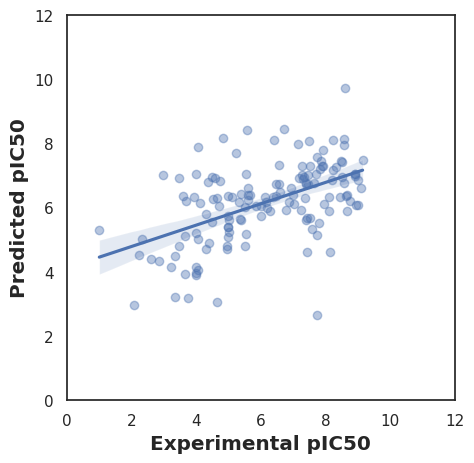

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

# Create a pandas DataFrame with your data
import pandas as pd  # Import pandas if not already imported
data = pd.DataFrame({'Experimental pIC50': Y_test, 'Predicted pIC50': Y_pred})

# Now use the 'x' and 'y' parameters to specify the columns
ax = sns.regplot(x='Experimental pIC50', y='Predicted pIC50', data=data, scatter_kws={'alpha':0.4})

ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show()